## Part (a)

In [9]:
import numpy as np
import pandas as pd
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import time
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = [12, 7]

# %matplotlib tk
# %matplotlib inline

In [10]:
def KDEstimate(d):
    mean = np.zeros(d)
    cov = np.identity(d)
    X = np.random.multivariate_normal(mean, cov, size=20)
    N = 500
    X_test = np.random.uniform(low=0, high=25, size=(N))
    
    #density estimation    
    Xlen = np.sum(X**2, axis=1)**(0.5)      #distances from mean([0,0])
    XlenMean = np.mean(Xlen)
    H = np.abs(Xlen - XlenMean)             #adaptive h based on its distance from each of the x_i
    f_est = np.zeros(N)
    for i in range(N):
        Z_i = (Xlen - X_test[i])/H
        arr = 1/H * norm.pdf(Z_i, loc=0, scale=1)
        f_est[i] = np.mean(arr)    
    return X_test, f_est

In [11]:
def plotDensity():
    for d in [2,5,10,20,50,100,200,500]:
        X_test, f_est = KDEstimate(d)
        plt.plot(X_test, f_est, '.', label='D='+str(d))
    plt.title('Kernel Density Estimates of length of vectors')
    plt.xlabel('||x||')
    plt.ylabel('f')
    plt.legend()
    plt.show()

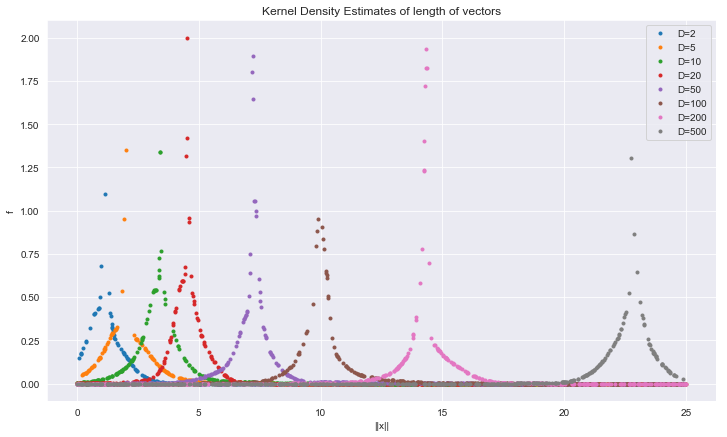

In [12]:
plotDensity()

## Part (b)

In [13]:
matplotlib.rcParams['figure.figsize'] = [8, 5]

In [17]:
def angle(v1, v2):
     return math.acos(np.dot(v1, v2) / (len(v1) * len(v2)))
    
def gen_table(d):
    mean = np.zeros(d)
    cov = np.identity(d)
    X = np.random.multivariate_normal(mean, cov, size=3)
    angles = [angle(X[0],X[1]), angle(X[1],X[2]), angle(X[2],X[0])]
    return angles

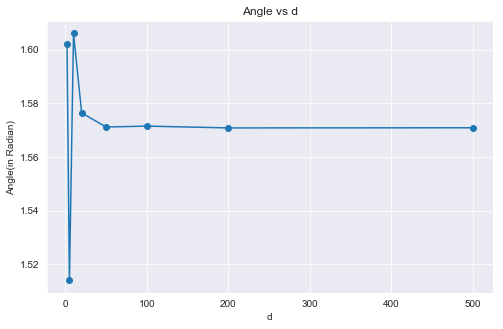

In [19]:
D = [2,5,10,20,50,100,200,500]
avg_angles = []
final_table = pd.DataFrame(data=None, index=['<(1-2)', '<(2-3)', '<(3-1)'])
for d in D:
    final_table['angle(D='+str(d)+')'] = gen_table(d)
    avg_angles.append(np.mean(gen_table(d)))
plt.plot(D, avg_angles, 'o-')
plt.title('Angle vs d')
plt.xlabel('d')
plt.ylabel('Angle(in Radian)')
plt.show()

In [20]:
final_table

,angle(D=2),angle(D=5),angle(D=10),angle(D=20),angle(D=50),angle(D=100),angle(D=200),angle(D=500)
<(1-2),1.569755,1.580762,1.596057,1.562645,1.572954,1.569896,1.570965,1.570758
<(2-3),1.672747,1.422867,1.567924,1.548808,1.567267,1.569756,1.570804,1.570808
<(3-1),2.162184,1.584563,1.562867,1.574807,1.570767,1.570106,1.570903,1.570801


## Part (c)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

matplotlib.rcParams['figure.figsize'] = [10, 6]

In [22]:
def plotit(D, error):
    alpha_ = 0.5
    plt.plot(D, error[0], 'o-', label='1NN', alpha=alpha_)
    plt.plot(D, error[1], 'o-', label='KDA', alpha=alpha_)
    plt.plot(D, error[2], 'o-', label='SVM_linear', alpha=alpha_)
    plt.plot(D, error[3], 'o-', label='SVM_rbf', alpha=alpha_)
    plt.plot(D, error[4], 'o-', label='GNB', alpha=alpha_)
    plt.xlabel('d');plt.ylabel('Misclassification Rate', alpha=alpha_)
    plt.legend()
    plt.show()

In [23]:
D = [2,5,10,20,50,100,200]

### (c.1) $N_d(0_d,I_d)$ and $N_d((1, 0_{d-1})^T, 1/4I_d)$

In [24]:
def classify1(d):
    mu0, cov0 = np.zeros(d), np.identity(d)
    mu1, cov1 = np.append(np.array([1]), np.zeros(d-1)), 0.25*np.identity(d)
    
    X0 = np.random.multivariate_normal(mu0, cov0, size=10)
    Y0 = np.zeros(10)
    X1 = np.random.multivariate_normal(mu1, cov1, size=10)
    Y1 = np.ones(10)
    
    X = np.append(X0, X1, axis=0); Y = np.append(Y0, Y1)
    p = np.random.permutation(20)
    X = X[p]; Y = Y[p]
    
    oneNN = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    oneNN.fit(X,Y)
    oneNN_err = 1 - oneNN.score(X,Y)
    
    kda = QuadraticDiscriminantAnalysis()
    kda.fit(X,Y)
    kda_err = 1 - kda.score(X,Y)
    
    svm1 = SVC(kernel='linear')
    svm1.fit(X,Y)
    svm1_err = 1 - svm1.score(X,Y)
    
    svm2 = SVC(kernel='rbf')
    svm2.fit(X,Y)
    svm2_err = 1 - svm2.score(X,Y)
    
    gNB = GaussianNB()
    gNB.fit(X,Y)
    gNB_err = 1 - gNB.score(X,Y)
    
    return oneNN_err, kda_err, svm1_err, svm2_err, gNB_err    

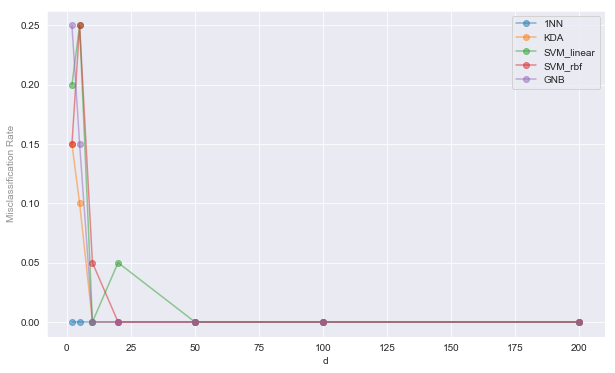

In [193]:
oneNN_err, kda_err, svm1_err, svm2_err, gNB_err = [],[],[],[],[]
for d in D:
    tuple_ = classify1(d)
    oneNN_err.append(tuple_[0])    
    kda_err.append(tuple_[1])
    svm1_err.append(tuple_[2])
    svm2_err.append(tuple_[3])
    gNB_err.append(tuple_[4])
plotit(D, (oneNN_err, kda_err, svm1_err, svm2_err, gNB_err))

### (c.2) $N_d(0_d,I_d)$ and $N_d(1_d, 1/4I_d)$

In [25]:
def classify2(d):
    mu0, cov0 = np.zeros(d), np.identity(d)
    mu1, cov1 = np.ones(d), 0.25*np.identity(d)
    
    X0 = np.random.multivariate_normal(mu0, cov0, size=10)
    Y0 = np.zeros(10)
    X1 = np.random.multivariate_normal(mu1, cov1, size=10)
    Y1 = np.ones(10)
    
    X = np.append(X0, X1, axis=0); Y = np.append(Y0, Y1)
    p = np.random.permutation(20)
    X = X[p]; Y = Y[p]
    
    oneNN = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    oneNN.fit(X,Y)
    oneNN_err = 1 - oneNN.score(X,Y)
    
    kda = QuadraticDiscriminantAnalysis()
    kda.fit(X,Y)
    kda_err = 1 - kda.score(X,Y)
    
    svm1 = SVC(kernel='linear')
    svm1.fit(X,Y)
    svm1_err = 1 - svm1.score(X,Y)
    
    svm2 = SVC(kernel='rbf')
    svm2.fit(X,Y)
    svm2_err = 1 - svm2.score(X,Y)
    
    gNB = GaussianNB()
    gNB.fit(X,Y)
    gNB_err = 1 - gNB.score(X,Y)
    
    return oneNN_err, kda_err, svm1_err, svm2_err, gNB_err    

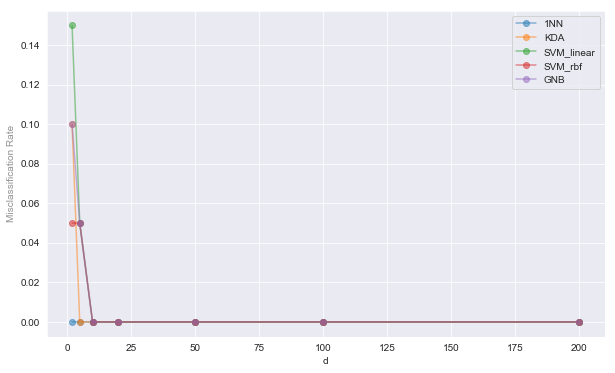

In [32]:
oneNN_err, kda_err, svm1_err, svm2_err, gNB_err = [],[],[],[],[]
for d in D:
    tuple_ = classify2(d)
    oneNN_err.append(tuple_[0])    
    kda_err.append(tuple_[1])
    svm1_err.append(tuple_[2])
    svm2_err.append(tuple_[3])
    gNB_err.append(tuple_[4])
plotit(D, (oneNN_err, kda_err, svm1_err, svm2_err, gNB_err))

### (c.3) $N_d(0_d,I_d)$ and $N_d(0_d, 1/4I_d)$

In [197]:
def classify3(d):
    mu0, cov0 = np.zeros(d), np.identity(d)
    mu1, cov1 = np.zeros(d), 0.25*np.identity(d)
    
    X0 = np.random.multivariate_normal(mu0, cov0, size=10)
    Y0 = np.zeros(10)
    X1 = np.random.multivariate_normal(mu1, cov1, size=10)
    Y1 = np.ones(10)
    
    X = np.append(X0, X1, axis=0); Y = np.append(Y0, Y1)
    p = np.random.permutation(20)
    X = X[p]; Y = Y[p]
    
    oneNN = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    oneNN.fit(X,Y)
    oneNN_err = 1 - oneNN.score(X,Y)
    
    kda = QuadraticDiscriminantAnalysis()
    kda.fit(X,Y)
    kda_err = 1 - kda.score(X,Y)
    
    svm1 = SVC(kernel='linear')
    svm1.fit(X,Y)
    svm1_err = 1 - svm1.score(X,Y)
    
    svm2 = SVC(kernel='rbf')
    svm2.fit(X,Y)
    svm2_err = 1 - svm2.score(X,Y)
    
    gNB = GaussianNB()
    gNB.fit(X,Y)
    gNB_err = 1 - gNB.score(X,Y)
    
    return oneNN_err, kda_err, svm1_err, svm2_err, gNB_err    

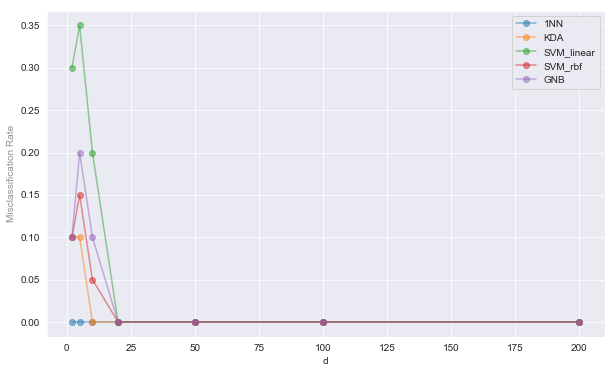

In [198]:
oneNN_err, kda_err, svm1_err, svm2_err, gNB_err = [],[],[],[],[]
for d in D:
    tuple_ = classify3(d)
    oneNN_err.append(tuple_[0])    
    kda_err.append(tuple_[1])
    svm1_err.append(tuple_[2])
    svm2_err.append(tuple_[3])
    gNB_err.append(tuple_[4])
plotit(D, (oneNN_err, kda_err, svm1_err, svm2_err, gNB_err))